# SI 618: Dimension Reduction


Note: some slides from Eytan Adar and Kevyn Collins-Thompson


## Dimensions & Factors
* Multi-Dimensional Scaling (MDS)
* Principal components analysis (PCA)
* t-distributed Stochastic Neighbor Embedding (t-SNE)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide24.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide25.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide26.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide27.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide28.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide29.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide30.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide31.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide32.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide41.png)

In [ ]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


In [ ]:


# The following code creates a synthetic dataset
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

In [ ]:

# Now create the metric and non-metric MDS models


mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data so we can visualize in 2 dimensions
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)


In [ ]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

Wait, what was that other dimension reduction we just did?


## Principal Components Analysis (PCA)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide43.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide44.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide45.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide50.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide51.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide52.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide53.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide54.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide55.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide56.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide57.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide58.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide59.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide60.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide61.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide62.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide63.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide64.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide65.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide66.png)

In [10]:
# loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# loading the data

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSb23GQT6cvFueM0yWDZ6YAFjVlLKUb_7fdMHsmQb6x84iXC3bCWgzXjnxLr15gniYY-oOPjOn0dv0o/pub?gid=0&single=true&output=csv")
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv"
data = pd.read_csv(url)
#data = data.drop(["Channel", "Region"], axis=1)
data.head(10)

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T,7,10,4,3,6,4,10,4,6,8
1,Joe D,8,8,7,9,7,10,8,6,4,7
2,Mike V,7,7,6,3,9,9,5,4,7,10
3,Emily S,2,5,5,5,3,9,5,8,9,10
4,Abdul W,5,7,6,7,8,9,8,4,10,8
5,Wenjie W,6,8,2,1,9,9,5,1,9,7
6,Nitanshi,7,5,8,7,7,6,6,4,10,9
7,Liya L,7,9,9,5,7,7,7,7,9,6
8,Bangzhao S,7,5,9,3,6,8,10,6,9,10
9,Vasilina F,7,10,6,3,4,1,7,3,4,8


In [15]:
data = data.dropna()

In [16]:
data = data.drop('Name',axis=1)

In [17]:
# scaling the data before PCA

from sklearn.preprocessing import scale

data = pd.DataFrame(scale(data), columns=['Blues', 'Classical', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Latin','Pop','Rock'])


In [18]:
data.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,0.602414,1.646753,-0.766041,-0.910905,-0.109593,-0.918741,1.878006,-0.315063,-0.772832,0.418067
1,1.124507,0.567369,0.634378,1.457448,0.365311,1.274988,0.853639,0.595119,-1.633988,0.055742
2,0.602414,0.027677,0.167572,-0.910905,1.315119,0.909366,-0.682911,-0.315063,-0.342254,1.142716
3,-2.008048,-1.051708,-0.299235,-0.121454,-1.534305,0.909366,-0.682911,1.505301,0.518902,1.142716
4,-0.441771,0.027677,0.167572,0.667997,0.840215,0.909366,0.853639,-0.315063,0.949480,0.418067


In [19]:
# implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

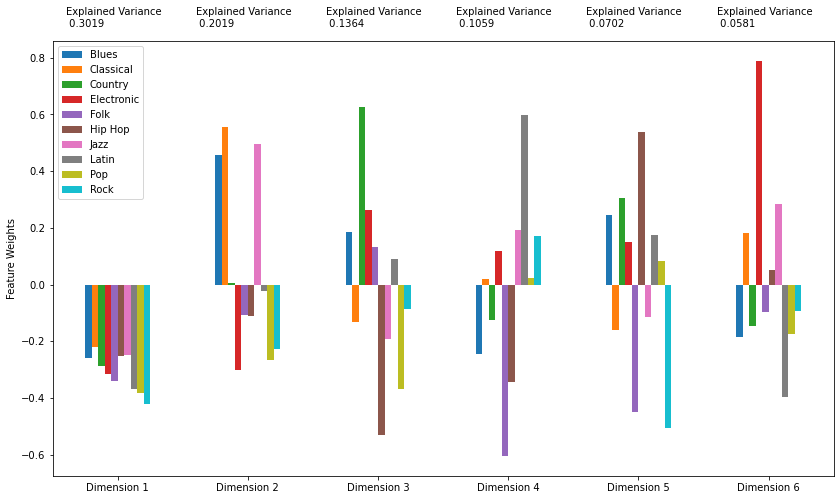

In [20]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [23]:
pca_results.cumsum()

,Explained Variance,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
Dimension 1,0.3019,-0.2595,-0.2214,-0.2861,-0.3172,-0.3401,-0.2514,-0.2482,-0.3694,-0.3841,-0.4204
Dimension 2,0.5038,0.1984,0.3336,-0.2791,-0.6184,-0.4483,-0.3624,0.2463,-0.3924,-0.6512,-0.6466
Dimension 3,0.6402,0.3831,0.2004,0.3460,-0.3555,-0.3155,-0.8942,0.0524,-0.3027,-1.0183,-0.7326
Dimension 4,0.7461,0.1363,0.2196,0.2206,-0.2361,-0.9208,-1.2371,0.2437,0.2955,-0.9949,-0.5604
Dimension 5,0.8163,0.3815,0.0593,0.5250,-0.0874,-1.3710,-0.6972,0.1277,0.4690,-0.9117,-1.0652
Dimension 6,0.8744,0.1980,0.2418,0.3788,0.7025,-1.4671,-0.6464,0.4113,0.0737,-1.0865,-1.1576


![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide68.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide69.png)

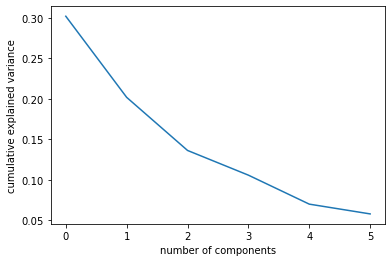

In [22]:
# Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide70.png)

## t-distributed Stochastic Neighbor Embedding (t-SNE)

additional slides: https://docs.google.com/presentation/d/1-JGfXOpHuw6taIvCtEWS_N3cDcE2v0kXSzN63pGSAxU/edit?usp=sharing


code based on https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html

Here, we will use another dimension reduction technique, t-SNE, on an image dataset consisting of digits. Our goal here is to see whether images of the same digit are grouped together in 2-D visualizations.

First, let's load the dataset.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits

The dataset is a dictionary containing multiple arrays.


|Key   |Value  |Description  |
| --- | --- | --- |
| image | numpy array (1797,8,8) | An 8x8 array for every image in the dataset |
| data | numpy array (1797,64) | An 64 array for every image in the dataset |
| target | numpy array (1797,) | A list containing the label(=digit) for every image in the dataset |

What does each image look like?

In [ ]:
digits.images[0]

When dealing with images in Python, each image is stored as an array, where the location of each value corresponds to its pixel location. The stored value is the color value of that pixel, which ranges between 0-1 or 0-255. When dealing with color images, an image becomes a combination of three different layers (RGB). Here, we are dealing with black and white images, so there is only one dimension.

In [ ]:
# when plotted as an image
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
rows = 3
cols = 3
figsize = (5, 5)

fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
for i in range(rows):
    for j in range(cols):
        axs[i,j].imshow(digits.images[i*3+j])
#         axs[i,j]
plt.show()

In [ ]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X = digits.data
X_2d = tsne.fit_transform(X)

In [ ]:
digits.data[0]

In [ ]:
X_2d

In [ ]:
# change to dataframe so that we can run it on seaborn
import pandas as pd
out = []
for i,(x,y) in enumerate(X_2d):
    out.append((digits.target[i],x,y))
df = pd.DataFrame(out,columns=['digit','x','y'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='x',y='y',hue='digit',legend='full',palette='Set2')
plt.show()

The default hyperparameters provided by sklearn are perplexity=30.0 and n_iter=1000.

See how changing these values can change the separation of the numbers. Typically perplexity works best between 5 and 50. The more number of iterations you run, the better the results will be, but it might take too long to converge. Or it could be that 1000 iterations is already too much, and it can converge even with fewer iterations.


In [ ]:
perplexity = 50
n_iter = 500
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
X_2d = tsne.fit_transform(X)
out = []
for i,(x,y) in enumerate(X_2d):
    out.append((digits.target[i],x,y))
df = pd.DataFrame(out,columns=['digit','x','y'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='x',y='y',hue='digit',legend='full',palette='Set2')
plt.show()

In [ ]:
X_2d = PCA(n_components=2).fit_transform(X)
out = []
for i,(x,y) in enumerate(X_2d):
    out.append((digits.target[i],x,y))
df = pd.DataFrame(out,columns=['digit','x','y'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='x',y='y',hue='digit',legend='full',palette='Set2')
plt.show()